In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [4]:
# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y_true = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Evaluate the model
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
ari_score = adjusted_rand_score(y_true, y_kmeans)


Silhouette Score: 0.345
Adjusted Rand Index: 0.677


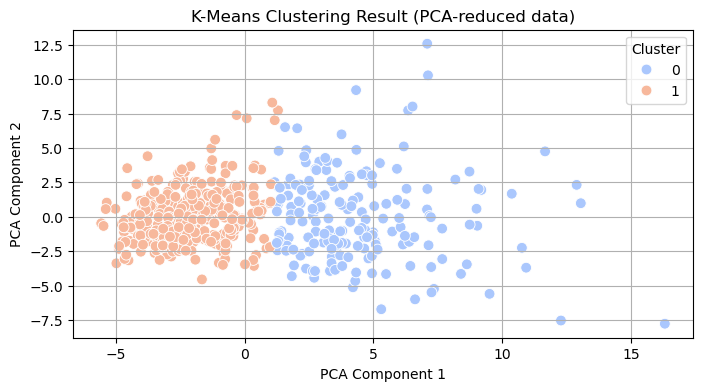

In [8]:
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Adjusted Rand Index: {ari_score:.3f}")

# Visualize the clustering result using PCA (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, 
                palette="coolwarm", s=60)
plt.title('K-Means Clustering Result (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


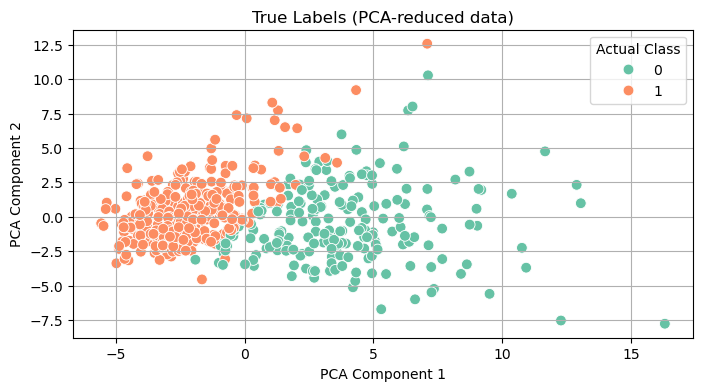

In [10]:
# compare with the true labels
plt.figure(figsize=(8,4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_true, 
                palette="Set2", s=60)
plt.title('True Labels (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Actual Class")
plt.grid(True)
plt.show()